<div class="alert alert-block alert-success">
    <b><center>Pandas</center></b>
</div>

# Configure Environment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame & Series

In [3]:
df = pd.DataFrame()

In [4]:
datas = [
    ['foo1', 'bar1'],
    ['foo2', 'bar2']
]
col_label = ["col1", "col2"]
df = pd.DataFrame(columns=col_label, data=datas)
df

,col1,col2
0,foo1,bar1
1,foo2,bar2


In [5]:
df = pd.DataFrame({
    "col1" : ['foo1', 'foo2'],
    "col2" : ['bar1', 'bar2']
})
df

,col1,col2
0,foo1,bar1
1,foo2,bar2


In [6]:
df.col1.to_numpy()

array(['foo1', 'foo2'], dtype=object)

In [7]:
type(df.col1)

pandas.core.series.Series

In [8]:
df.col1.values, type(df.col1.values)

(array(['foo1', 'foo2'], dtype=object), numpy.ndarray)

# Loading Data

In [9]:
df = pd.read_csv("resources/demo.csv")

In [10]:
df

,index,Animal,Cuteness,Description
0,1,dog,8.5,want to
1,2,cat,'9.1',na
2,3,tiger,2.3,-


In [11]:
df = pd.read_csv("resources/demo.csv", quotechar="'", na_values=["na", "-"])
df

,index,Animal,Cuteness,Description
0,1,"""dog""",8.5,want to
1,2,cat,9.1,NaN
2,3,tiger,2.3,NaN


# Check Basic Info

In [12]:
df = pd.read_csv("resources/iris.csv")

In [13]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


<AxesSubplot:>

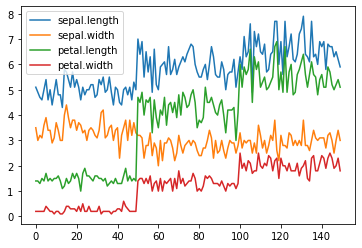

In [14]:
df.plot()

<AxesSubplot:>

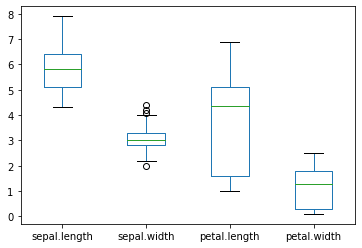

In [16]:
df.plot(kind="box")

<AxesSubplot:>

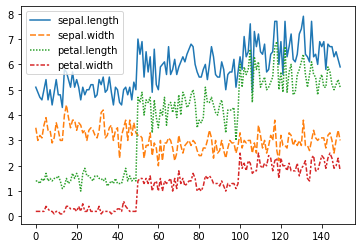

In [16]:
sns.lineplot(
    data= df
)

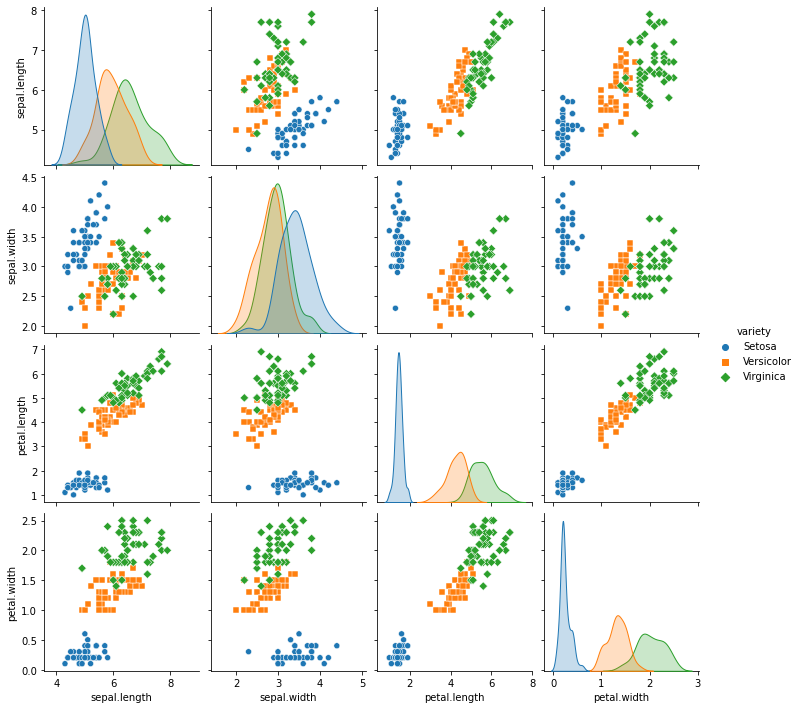

In [17]:
sns.pairplot(df, hue="variety", markers=["o", "s", "D"])

# Modify

In [18]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [19]:
df.rename(columns={"sepal.length": "sepal_length"}, inplace=True)
df.head()

,sepal_length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [20]:
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "variety"]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [21]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
variety          object
dtype: object

In [22]:
df = df.astype({"petal_width": "float32"})
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float32
variety          object
dtype: object

In [23]:
df["length_sum"] = df.sepal_length + df.petal_length
df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety,length_sum
0,5.1,3.5,1.4,0.2,Setosa,6.5
1,4.9,3.0,1.4,0.2,Setosa,6.3
2,4.7,3.2,1.3,0.2,Setosa,6.0
3,4.6,3.1,1.5,0.2,Setosa,6.1
4,5.0,3.6,1.4,0.2,Setosa,6.4


In [24]:
len(df)

150

In [25]:
df.apply(lambda x: x.sepal_width <=3, axis=1)

0      False
1       True
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148    False
149     True
Length: 150, dtype: bool

In [26]:
df[df.apply(lambda x: x.sepal_width <=3, axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,variety,length_sum
1,4.9,3.0,1.4,0.2,Setosa,6.3
8,4.4,2.9,1.4,0.2,Setosa,5.8
12,4.8,3.0,1.4,0.1,Setosa,6.2
13,4.3,3.0,1.1,0.1,Setosa,5.4
25,5.0,3.0,1.6,0.2,Setosa,6.6
...,...,...,...,...,...,...
142,5.8,2.7,5.1,1.9,Virginica,10.9
145,6.7,3.0,5.2,2.3,Virginica,11.9
146,6.3,2.5,5.0,1.9,Virginica,11.3
147,6.5,3.0,5.2,2.0,Virginica,11.7


In [27]:
def applyme(row):
    print(row)

In [28]:
# df.apply(applyme, axis=0)

In [29]:
def applyme(row):
    row.length_sum = row.sepal_length + row.sepal_width * row.petal_length
    return row

In [30]:
df.apply(applyme, axis=1)

,sepal_length,sepal_width,petal_length,petal_width,variety,length_sum
0,5.1,3.5,1.4,0.2,Setosa,10.00
1,4.9,3.0,1.4,0.2,Setosa,9.10
2,4.7,3.2,1.3,0.2,Setosa,8.86
3,4.6,3.1,1.5,0.2,Setosa,9.25
4,5.0,3.6,1.4,0.2,Setosa,10.04
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,22.30
146,6.3,2.5,5.0,1.9,Virginica,18.80
147,6.5,3.0,5.2,2.0,Virginica,22.10
148,6.2,3.4,5.4,2.3,Virginica,24.56


In [31]:
df.drop("length_sum", axis=1, inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# Query

In [32]:
(df.sepal_length > 5) & (df.petal_length < 6)

0       True
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Length: 150, dtype: bool

In [33]:
df[(df.sepal_length > 5) & (df.petal_length < 6)]

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
10,5.4,3.7,1.5,0.2,Setosa
14,5.8,4.0,1.2,0.2,Setosa
15,5.7,4.4,1.5,0.4,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [34]:
# df[df.variety.isin(["Setosa"])]
# df[df.variety.str.contains("nica")]

In [35]:
df.drop(0).head()

,sepal_length,sepal_width,petal_length,petal_width,variety
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa


In [36]:
df.drop(range(2, 5)).head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa


In [37]:
df.drop(df[df.sepal_length > 5].index).head()

,sepal_length,sepal_width,petal_length,petal_width,variety
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
6,4.6,3.4,1.4,0.3,Setosa


In [38]:
df.loc[1:2, "sepal_length":"sepal_width"]

,sepal_length,sepal_width
1,4.9,3.0
2,4.7,3.2


In [39]:
df.loc[df.variety == "Setosa", ["sepal_length", "sepal_width"]].head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [40]:
df.iloc[1:3, 2:4]

,petal_length,petal_width
1,1.4,0.2
2,1.3,0.2


# Join

In [41]:
customer = pd.DataFrame({
    "custom_id": [1, 2, 3, 5, 5, 6],
    "state"  : ["seoul", "california", "beijing", "moscow", "tokyo", "gana"]
})
customer

,custom_id,state
0,1,seoul
1,2,california
2,3,beijing
3,5,moscow
4,5,tokyo
5,6,gana


In [42]:
transaction = pd.DataFrame({
    "custom_id": [1, 3, 4, 5, 3],
    "product"  : ["oven", "television", "table", "television", "spoon"]
})
transaction

,custom_id,product
0,1,oven
1,3,television
2,4,table
3,5,television
4,3,spoon


In [43]:
# Inner Join (Natural Join)
pd.merge(customer, transaction, on="custom_id", how="inner")

,custom_id,state,product
0,1,seoul,oven
1,3,beijing,television
2,3,beijing,spoon
3,5,moscow,television
4,5,tokyo,television


## Full Outer Join

In [44]:
pd.merge(customer, transaction, on="custom_id", how="outer").sort_values("custom_id")

,custom_id,state,product
0,1,seoul,oven
1,2,california,NaN
2,3,beijing,television
3,3,beijing,spoon
7,4,NaN,table
4,5,moscow,television
5,5,tokyo,television
6,6,gana,NaN


## Left Outer Join

In [45]:
df_left = pd.merge(customer, transaction, on="custom_id", how="left").sort_values("custom_id")
df_left

,custom_id,state,product
0,1,seoul,oven
1,2,california,NaN
2,3,beijing,television
3,3,beijing,spoon
4,5,moscow,television
5,5,tokyo,television
6,6,gana,NaN


## Left Outer Join If NULL

In [46]:
df_left[df_left["product"].isna()]

,custom_id,state,product
1,2,california,NaN
6,6,gana,NaN


## Right Outer Join

In [47]:
df_right = pd.merge(customer, transaction, on="custom_id", how="right").sort_values("custom_id")
df_right

,custom_id,state,product
0,1,seoul,oven
1,3,beijing,television
2,3,beijing,spoon
3,4,NaN,table
4,5,moscow,television
5,5,tokyo,television


## Right Outer Join If NULL

In [48]:
df_right[df_right["state"].isna()]

,custom_id,state,product
3,4,NaN,table
